# LOAN APPROVAL PREDICTION USING MACHINE LEARNING

PROBLEM STATEMENT IS TO PREDICT WHETHER THE LOAN SHOULD BE APPROVED OR NOT BASED ON THE CANDIDATES PROFILE KEY FEATURES LIKE MARITAL STATUS,EDUCATION,APPLICANT INCOME,CREDIT HISTORY,ETC

## IMPORTING THE LIBARARIES

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#sklearn model imports 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#sklearn other imports
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

#sklearn performance metrics imports
from sklearn.metrics import precision_score,recall_score,f1_score

In [17]:
df = pd.read_csv("loan_train.csv")

In [18]:
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [19]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [20]:
df.shape

(614, 13)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [22]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

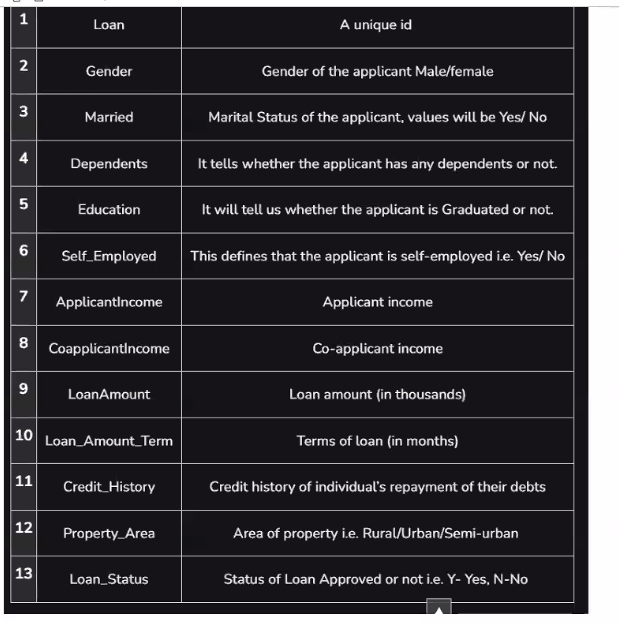

In [23]:
df.drop("Loan_ID",axis = 1,inplace = True)

# VISUALISING TARGET VARIABLE

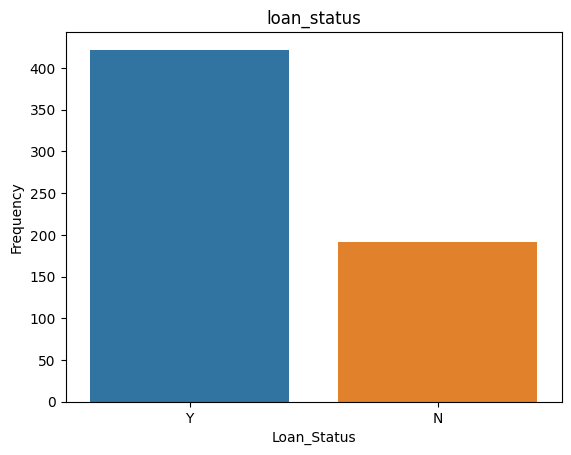

In [24]:
loan_status_freq = df["Loan_Status"].value_counts()

sns.barplot(x = loan_status_freq.index , y = loan_status_freq.values)
plt.ylabel("Frequency")
plt.title("loan_status")
plt.show()

In [25]:
df["Loan_Status"].value_counts()


Loan_Status
Y    422
N    192
Name: count, dtype: int64

# VIsualizing categorical independent variables

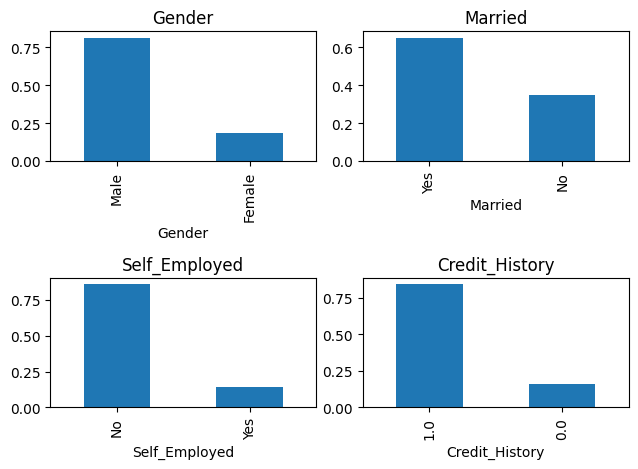

In [26]:
plt.figure(1)
plt.subplot(221)
df["Gender"].value_counts(normalize = True).plot.bar(title = "Gender")
plt.subplot(222)
df["Married"].value_counts(normalize = True).plot.bar(title = "Married")
plt.subplot(223)
df["Self_Employed"].value_counts(normalize = True).plot.bar(title = "Self_Employed")
plt.subplot(224)
df["Credit_History"].value_counts(normalize = True).plot.bar(title = "Credit_History")
plt.tight_layout()
plt.show()

1) 80 % of applicants in the dataset are male

2) around 65 percent of the applicants in the dataset are married

3) about 15 percent of the applicants in the dataset are self employed

4) about 85 percent of the applicant in the dataset have repaid their debts

# visualizing ordianl independent variables


these are the variables which represent data in a particular rank or order for example dependents,graudation etc

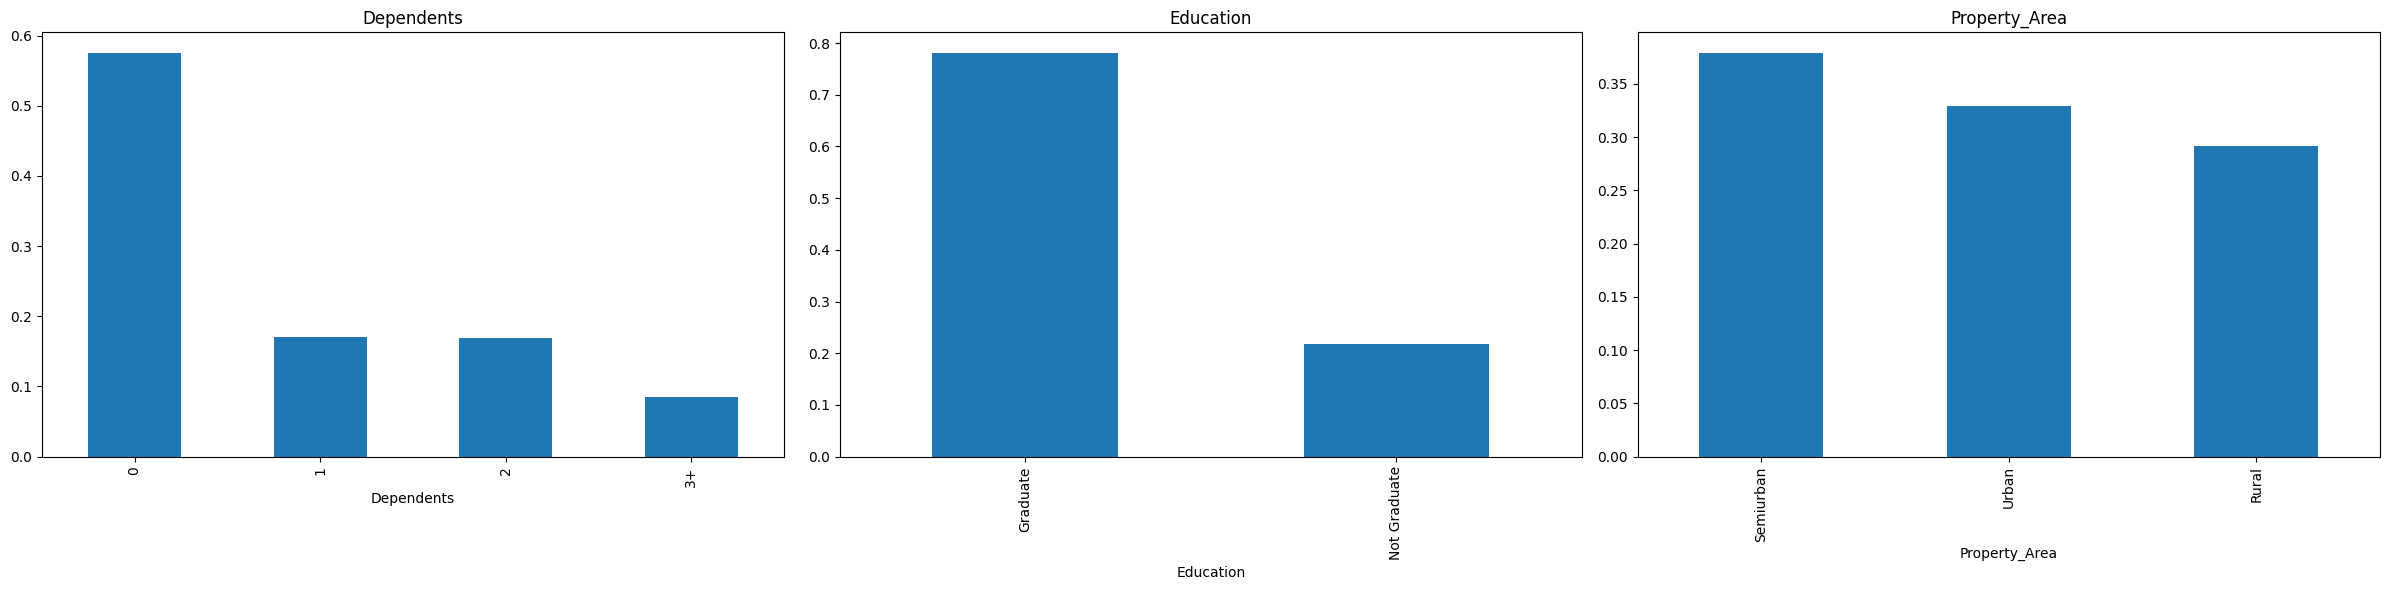

In [27]:
plt.figure(1)
plt.subplot(131)
df["Dependents"].value_counts(normalize = True).plot.bar(figsize=(24,6),title = "Dependents")
plt.subplot(132)
df["Education"].value_counts(normalize = True).plot.bar(title = "Education")
plt.subplot(133)
df["Property_Area"].value_counts(normalize = True).plot.bar(title = "Property_Area")
plt.tight_layout()
plt.show()

1) most of the applicants dont have dependents

2) about 80 percent of the applicants are graduates

3) most of the applicants are from semi urban areas

# visualizing numerical independent variables

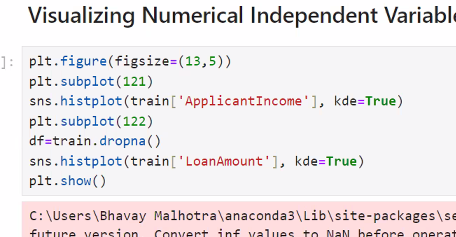

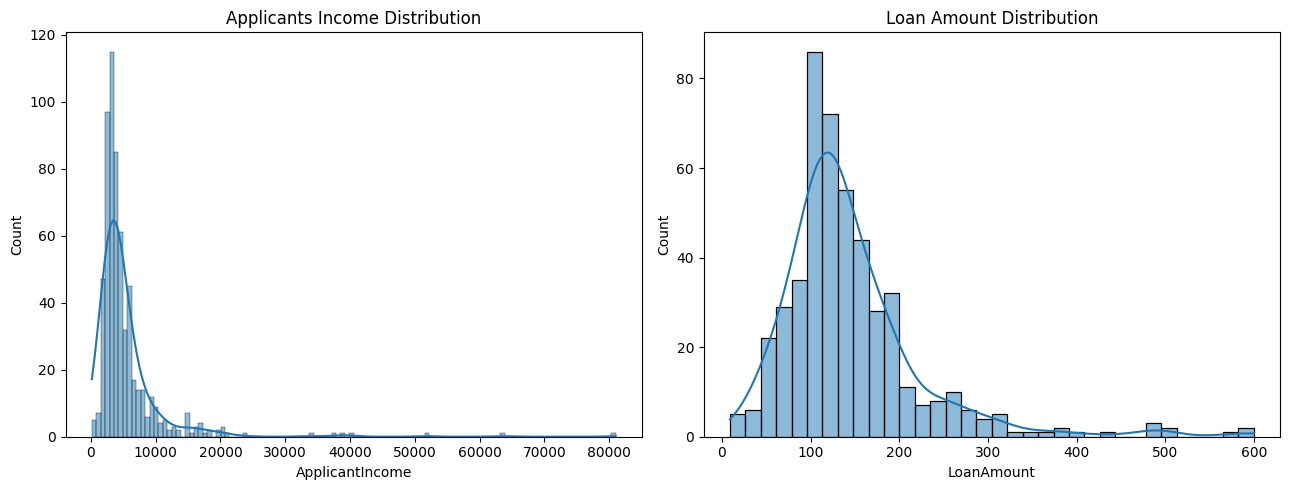

In [28]:

plt.figure(figsize=(13,5))

# Plot for "ApplicantsIncome"
plt.subplot(121)
sns.histplot(df["ApplicantIncome"], kde=True)
plt.title('Applicants Income Distribution')

# Plot for "LoanAmount"
plt.subplot(122)
df1 = df.dropna()  # Dropping rows with missing values for the "LoanAmount" plot
sns.histplot(df1["LoanAmount"], kde=True)
plt.title('Loan Amount Distribution')

plt.tight_layout()
plt.show()


1) we see that both the appplicantincome and loanamount have many outliers and is right skewed

# filling up missing values

In [29]:
imputer = SimpleImputer(strategy = "most_frequent") ##mode strategy

cols_to_impute = ["Gender","Married","Dependents","Self_Employed","Credit_History","Loan_Amount_Term"]

df[cols_to_impute] = imputer.fit_transform(df[cols_to_impute])

In [30]:
loan_amount_reshaped = df["LoanAmount"].values.reshape(-1,1)

imputer = SimpleImputer(strategy = "median")

df["LoanAmount"] = imputer.fit_transform(loan_amount_reshaped)

In [32]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# TRANSFORMING CATEGORICAL FEATURES


In [34]:
le = LabelEncoder()

cols = ["Gender","Married","Dependents","Education","Self_Employed", "Property_Area","Loan_Status"]

for col in cols:
    df.loc[:, col] = le.fit_transform(df[col])

In [35]:
df[["Gender","Married","Dependents","Education","Self_Employed","Property_Area","Loan_Status"]] = df[["Gender","Married","Dependents","Education","Self_Employed","Property_Area","Loan_Status"]]

# plotting the correlation matrix for all numerical variables

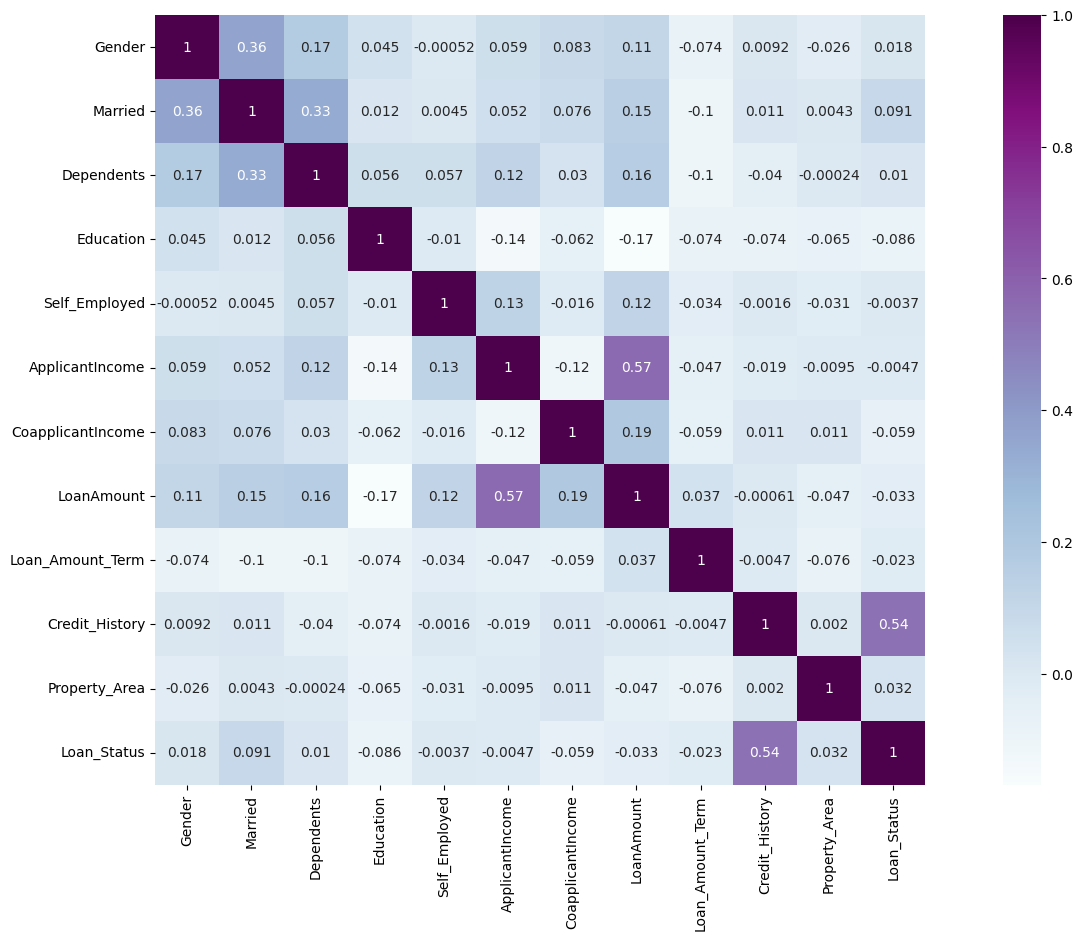

In [36]:
# correlation matrix

corrmat = df.corr()
fig = plt.figure(figsize = (20,10))
sns.heatmap(corrmat, annot = True, square = True, cmap = "BuPu")
plt.show()

# preparing the dataset

In [37]:
X = df.drop(["Loan_Status"],axis = 1)
Y = df["Loan_Status"]
print("Features shape:",X.shape)
print("Labels shape:",Y.shape)

Features shape: (614, 11)
Labels shape: (614,)


# transforing the features

In [39]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_transformed = scaler.fit_transform(X)


In [40]:
X_transformed

array([[1.        , 0.        , 0.        , ..., 0.74358974, 1.        ,
        1.        ],
       [1.        , 1.        , 0.33333333, ..., 0.74358974, 1.        ,
        0.        ],
       [1.        , 1.        , 0.        , ..., 0.74358974, 1.        ,
        1.        ],
       ...,
       [1.        , 1.        , 0.33333333, ..., 0.74358974, 1.        ,
        1.        ],
       [1.        , 1.        , 0.66666667, ..., 0.74358974, 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.74358974, 0.        ,
        0.5       ]])